### Домашнее задание по математической статистике
#### Лайко Рудольф, БПМ142

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

* Сгенерируем выборку $Y$ размером $n=$ 200 из генеральной совокупности с экспоненциальным распределением $Exp(\lambda)$
c параметром $\lambda = \dfrac{1}{2\theta  - 2}$, где $\theta = 1,5$

In [98]:
size = 200
tetta = 1.5
lambda0 = 1.0/(2*tetta - 2)

Y = np.random.exponential(lambda0, size)
pd.DataFrame(Y, columns=["Y"]).tail()


,Y
195,0.246889
196,1.699793
197,0.287402
198,0.044318
199,1.044578


* выше мы вывели 5 последних элементов из выборки $Y$
* убедимся в ее корректности: выведем выборочное среднее, которое должно совпадать с параметром $\lambda=\dfrac{1}{2\theta-2} = 1$

In [112]:
print("Математическое ожидание Y:" ,Y.mean())
print("Лямбда: ", lambda0)

Математическое ожидание Y: 0.949759281083
Лямбда:  1.0


* далее построим эмпирическую функцию распределения, сравним ее с теоретической

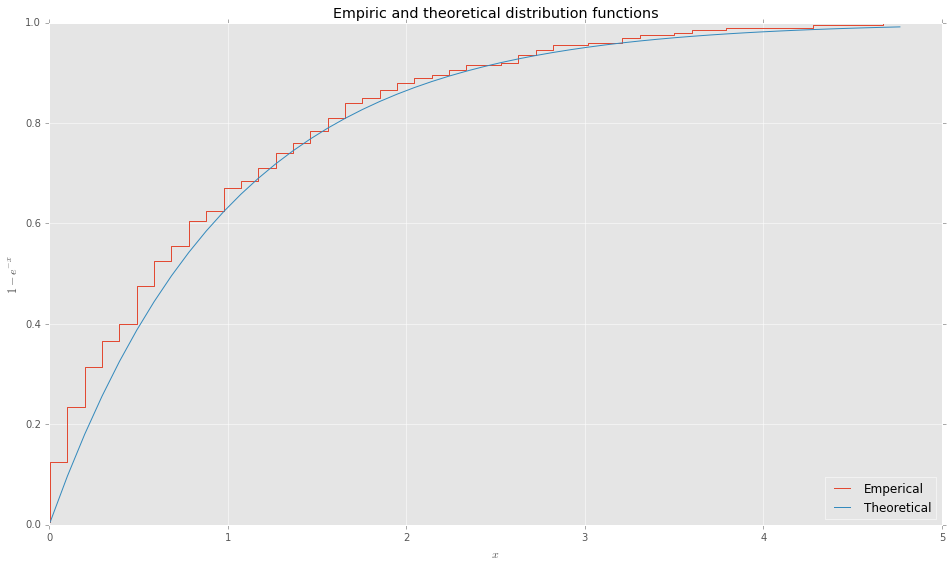

In [111]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(Y)

x = np.linspace(min(Y), max(Y))
y = ecdf(x)

plt.figure(figsize=(16,9))
plt.title("Empiric and theoretical distribution functions")
plt.step(x, y, label="Emperical")
plt.plot(x, 1-np.exp(-x), label="Theoretical")
plt.xlabel('$x$')
plt.ylabel('$1-e^{-x}$')
plt.legend(loc=4)

* построим гистограмму с $1-log_2(n)$ корзин, полигон частот
* на том же графике отобразим график плотности распределения, чтобы сравнить его с полигоном частот

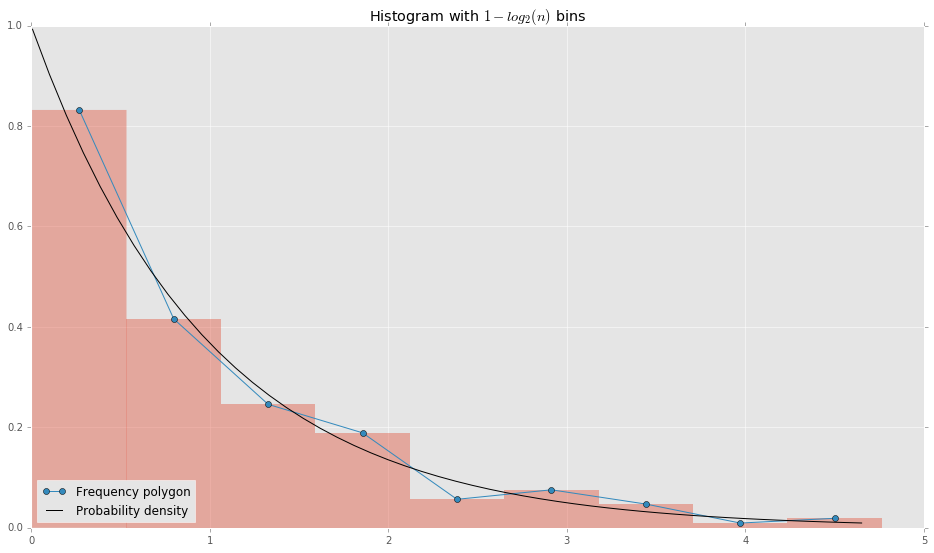

In [109]:
plt.figure(figsize=(16, 9))
(heights, edges, bars) = plt.hist(Y, normed=True, bins=int(round(1+np.log2(size))), lw=0,alpha=.4)
plt.plot(edges[:9] + (edges[1] - edges[0])/2, heights,'-o', label="Frequency polygon")
plt.title("Histogram with $1-log_2(n)$ bins")

plt.plot(x, np.exp(-x), label="Probability density", color='black')

plt.legend(loc=3)